In [219]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs


In [3]:
trocafone = pd.read_csv('/home/santi/fiuba-trocafone-tp1-final-set/events.csv',dtype=object)

In [ ]:
# Breve descripcion del set de datos.

In [35]:
# Columnas
trocafone.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version', 'timestamp_datetime',
       'timestamp_year', 'timestamp_month', 'timestamp_day',
       'timestamp_dayofyear'],
      dtype='object')

In [5]:
trocafone.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
trocafone.describe()

,timestamp_year,timestamp_month,timestamp_day,timestamp_dayofyear
count,"1,011,288.00","1,011,288.00","1,011,288.00","1,011,288.00"
mean,"2,018.00",4.84,15.21,130.59
std,0.00,1.11,8.77,32.06
min,"2,018.00",1.00,1.00,1.00
25%,"2,018.00",4.00,8.00,120.00
50%,"2,018.00",5.00,15.00,140.00
75%,"2,018.00",6.00,23.00,153.00
max,"2,018.00",6.00,31.00,166.00


In [34]:
trocafone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 28 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

In [ ]:
# Analizo eventos y relacion de estos con otras variables

In [7]:
# Hay eventos nulos en la columna event?
trocafone['event'].isnull().sum()

0

In [27]:
# Comprobamos si hay alguna fecha nula. 
trocafone['timestamp'].isnull().any()

False

In [287]:
# Agregamos nuevas columnas para trabajar mejor con el tiempo. (año, mes, dia, dia del año)
trocafone['timestamp_datetime'] = pd.to_datetime(trocafone['timestamp'])
trocafone['timestamp_year'] = trocafone['timestamp_datetime'].dt.year
trocafone['timestamp_month'] = trocafone['timestamp_datetime'].dt.month
trocafone['timestamp_day'] = trocafone['timestamp_datetime'].dt.day
trocafone['timestamp_weekday'] = trocafone['timestamp_datetime'].dt.weekday_name
trocafone['timestamp_dayofyear'] = trocafone['timestamp_datetime'].dt.dayofyear

## Eventos en general

In [31]:
# Nombres de los eventos.

trocafone['event'].value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

Text(0,0.5,'Eventos')

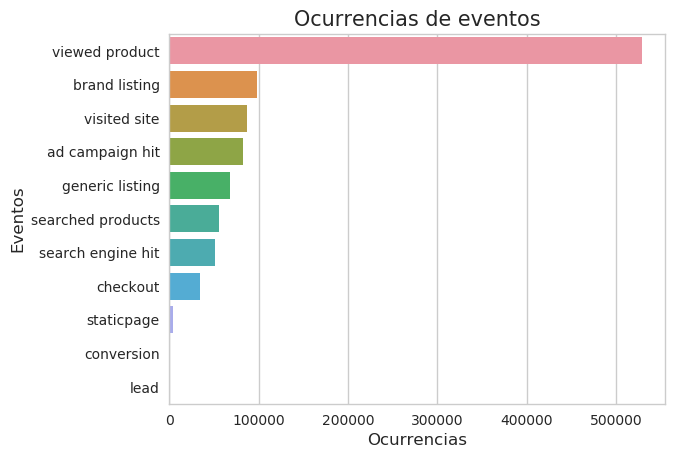

In [32]:
# Ocurrencias de eventos (grafico)

g1 = sns.barplot(x=trocafone['event'].value_counts().values, y=trocafone['event'].value_counts().index, orient='h')
g1.set_title("Ocurrencias de eventos", fontsize=15)
g1.set_xlabel("Ocurrencias", fontsize=12)
g1.set_ylabel("Eventos", fontsize=12)

In [ ]:
# Analizamos la evolucion de las visitas en la pagina. hacer

trocafone.loc(trocafone[''])

In [40]:
trocafone.groupby('timestamp_dayofyear').agg({'person':'d'})

,person
timestamp_dayofyear,
1,29
2,278
3,454
4,476
5,789
6,308
7,376
8,460
9,739


In [ ]:
# Analizo el evento viewed product y brand listing.

In [294]:
# Modelo de celular mas visitado.
# Me quedo solo con el evento viewed product.
viewed_product = trocafone.loc[trocafone['event'] == 'viewed product']

In [84]:
# Veo si hay algun valor nulo en la columna model.
viewed_product['model'].isnull().sum()

0

## Celulares mas visitados

In [85]:
# Modelo de celular mas visitado.
viewed_product['model'].value_counts()

iPhone 6                                     47538
iPhone 5s                                    42045
iPhone 6S                                    36930
iPhone 7                                     26330
Samsung Galaxy S7 Edge                       23062
Samsung Galaxy S7                            18085
iPhone 7 Plus                                17853
iPhone SE                                    15874
Samsung Galaxy S8                            15868
iPhone 6S Plus                               12250
iPhone 6 Plus                                12098
iPhone 5c                                    12049
Samsung Galaxy J5                            11036
Samsung Galaxy S6 Flat                       10724
Samsung Galaxy S6 Edge                       10580
Samsung Galaxy S8 Plus                       10006
iPhone 5                                      8846
Samsung Galaxy J7 Prime                       8400
Motorola Moto G4 Plus                         7522
Motorola Moto X Play 4G Dual   

In [86]:
# 15 celulares mas visitados.
viewed_product['model'].value_counts().head(15)

iPhone 6                  47538
iPhone 5s                 42045
iPhone 6S                 36930
iPhone 7                  26330
Samsung Galaxy S7 Edge    23062
Samsung Galaxy S7         18085
iPhone 7 Plus             17853
iPhone SE                 15874
Samsung Galaxy S8         15868
iPhone 6S Plus            12250
iPhone 6 Plus             12098
iPhone 5c                 12049
Samsung Galaxy J5         11036
Samsung Galaxy S6 Flat    10724
Samsung Galaxy S6 Edge    10580
Name: model, dtype: int64

Text(0,0.5,'Celulares')

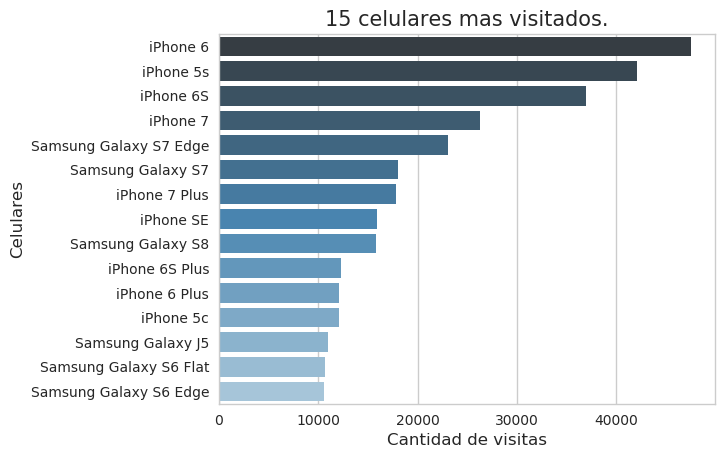

In [116]:
# Grafico de barras de los 15 celulares mas visitados.

g2 = sns.barplot(x=viewed_product['model'].value_counts().head(15).values, y=viewed_product['model'].value_counts().head(15).index,palette="Blues_d", orient='h')

g2.set_title("15 celulares mas visitados.", fontsize=15)
g2.set_xlabel("Cantidad de visitas", fontsize=12)
g2.set_ylabel("Celulares", fontsize=12)

In [123]:
# Columnas que puedo relacionar con las visitas a los productos (no tienen valores nulos).
viewed_product.dropna(axis = 'columns').columns

Index(['timestamp', 'event', 'person', 'sku', 'model', 'condition', 'storage',
       'color', 'timestamp_datetime', 'timestamp_year', 'timestamp_month',
       'timestamp_day', 'timestamp_dayofyear'],
      dtype='object')

In [156]:
# Visitas de cada celular para cada color.
visitas_por_color = viewed_product.groupby(['model','color']).agg({'timestamp':'count'})
visitas_por_color.columns = ['visitas']
visitas_por_color

visitas
model                     color                   
Asus Live                 Preto Azul             4
Asus Zenfone 2            Cinza                 63
                          Dourado               18
                          Preto                 21
                          Vermelho              36
Asus Zenfone 2 Deluxe     Branco               151
                          Roxo                  50
Asus Zenfone 2 Laser      Dourado                1
                          Preto                  5
                          Vermelho               6
Asus Zenfone 3 Max  32 GB Cinza                 23
                          Dourado               86
                          Prata                  9
                          Rosa                   6
Asus Zenfone 3 Max 16 GB  Cinza                 62
                          Dourado               44
                          Prata                 35
Asus Zenfone 3 Zoom       Prata                  1
                          Preto                 40
                          Rosa                   1
Asus Zenfone 5            Branco               140
                          Dourado               12
                          Preto                346
                          Roxo                  59
                          Vermelho             163
Asus Zenfone 6            Branco                96
                          Dourado               35
                          Preto                289
                          Vermelho             163
Asus Zenfone Go           Branco                 2
...                                            ...
iPhone 6S                 Ouro Rosa          10636
                          Prateado            6279
iPhone 6S Plus            Cinza espacial      3497
                          Dourado             2463
                          Ouro Rosa           2861
                          Prateado            3429
iPhone 7                  Dourado             4038
                          Ouro Rosa           6593
                          Prateado            1709
                          Preto Brilhante     3468
                          Preto Matte         9231
                          Vermelho            1291
iPhone 7 Plus             Dourado             2014
                          Ouro Rosa           5521
                          Prateado            1497
                          Preto Brilhante     2332
                          Preto Matte         5722
                          Vermelho             767
iPhone 8                  Cinza espacial       355
                          Dourado              481
                          Prateado             161
iPhone 8 Plus             Cinza espacial       715
                          Dourado              246
                          Prateado             187
iPhone SE                 Cinza espacial      4830
                          Dourado             2990
                          Ouro Rosa           5752
                          Prateado            2302
iPhone X                  Cinza espacial       460
                          Prateado             234

[574 rows x 1 columns]

In [155]:
# Visitas de cada celular para cada capacidad de almacenamiento.
visitas_por_storage = viewed_product.groupby(['model','storage']).agg({'timestamp':'count'})
visitas_por_storage.columns = ['visitas']
visitas_por_storage

visitas
model                     storage         
Asus Live                 16GB           4
Asus Zenfone 2            16GB          95
                          32GB          35
                          64GB           8
Asus Zenfone 2 Deluxe     128GB        201
Asus Zenfone 2 Laser      16GB          12
Asus Zenfone 3 Max  32 GB 32GB         124
Asus Zenfone 3 Max 16 GB  16GB         141
Asus Zenfone 3 Zoom       128GB          1
                          32GB          16
                          64GB          25
Asus Zenfone 5            8GB          720
Asus Zenfone 6            8GB          583
Asus Zenfone Go           16GB           9
Asus Zenfone Selfie       32GB          49
LG  X Screen              16GB         283
LG G3 Beat D724           8GB          304
LG G3 D855                16GB        1065
LG G3 Stylus D690         8GB          251
LG G4 Beat H736           8GB          312
LG G4 H815P               32GB         539
LG G4 H818P               32GB        1266
LG G4 Stylus H630         16GB         106
LG G4 Stylus HDTV H540T   16GB         133
LG G5 SE                  32GB        1143
LG G6                     32GB          93
LG K10                    16GB         236
LG K10 Novo               32GB         816
LG K10 TV                 16GB         795
LG K4                     8GB           53
...                                    ...
iPhone 6                  128GB       6218
                          16GB       25915
                          64GB       15405
iPhone 6 Plus             128GB       1015
                          16GB        7080
                          64GB        4003
iPhone 6S                 128GB       3506
                          16GB       16530
                          32GB        5563
                          64GB       11331
iPhone 6S Plus            128GB       1989
                          16GB        5111
                          32GB        1055
                          64GB        4095
iPhone 7                  128GB      11175
                          256GB       2187
                          32GB       12968
iPhone 7 Plus             128GB       9797
                          256GB       2840
                          32GB        5216
iPhone 8                  256GB        372
                          64GB         625
iPhone 8 Plus             256GB        595
                          64GB         553
iPhone SE                 128GB        512
                          16GB        7075
                          32GB        1592
                          64GB        6695
iPhone X                  256GB        556
                          64GB         138

[281 rows x 1 columns]

In [157]:
# Visitas de cada celular para cada condicion de producto.
visitas_por_condition = viewed_product.groupby(['model','condition']).agg({'timestamp':'count'})
visitas_por_condition.columns = ['visitas']
visitas_por_condition

visitas
model                     condition                  
Asus Live                 Excelente                 4
Asus Zenfone 2            Bom                      73
                          Excelente                25
                          Muito Bom                40
Asus Zenfone 2 Deluxe     Bom                      13
                          Excelente                30
                          Muito Bom               158
Asus Zenfone 2 Laser      Bom                       6
                          Excelente                 2
                          Muito Bom                 4
Asus Zenfone 3 Max  32 GB Bom                       7
                          Excelente                18
                          Muito Bom                99
Asus Zenfone 3 Max 16 GB  Bom                      37
                          Excelente                40
                          Muito Bom                64
Asus Zenfone 3 Zoom       Bom                       1
                          Excelente                10
                          Muito Bom                31
Asus Zenfone 5            Bom                     203
                          Excelente               336
                          Muito Bom               181
Asus Zenfone 6            Bom                     136
                          Excelente               217
                          Muito Bom               230
Asus Zenfone Go           Excelente                 4
                          Muito Bom                 5
Asus Zenfone Selfie       Bom                      24
                          Excelente                 5
                          Muito Bom                20
...                                               ...
iPhone 6 Plus             Bom - Sem Touch ID       26
                          Excelente              3249
                          Muito Bom              4185
iPhone 6S                 Bom                   13295
                          Bom - Sem Touch ID      426
                          Excelente             11571
                          Muito Bom             11638
iPhone 6S Plus            Bom                    5388
                          Bom - Sem Touch ID       23
                          Excelente              3701
                          Muito Bom              3138
iPhone 7                  Bom                   10508
                          Excelente              7701
                          Muito Bom              8121
iPhone 7 Plus             Bom                    4919
                          Excelente              7218
                          Muito Bom              5716
iPhone 8                  Bom                     150
                          Excelente               558
                          Muito Bom               289
iPhone 8 Plus             Bom                     114
                          Excelente               733
                          Muito Bom               301
iPhone SE                 Bom                    5165
                          Bom - Sem Touch ID      568
                          Excelente              5249
                          Muito Bom              4892
iPhone X                  Bom                      58
                          Excelente               356
                          Muito Bom               280

[578 rows x 1 columns]

In [264]:
cel_mas_visitados = ['iPhone 6','iPhone 5s','iPhone 6S','iPhone 7', 'Samsung Galaxy S7 Edge']
cel_mas_visitados_por_storage = viewed_product[['model','storage']].loc[viewed_product['model'].isin(cel_mas_visitados)]
cel_mas_visitados_por_storage = pd.crosstab(cel_mas_visitados_por_storage.model,cel_mas_visitados_por_storage.storage)
cel_mas_visitados_por_storage

storage,128GB,16GB,256GB,32GB,64GB
model,,,,,
Samsung Galaxy S7 Edge,1758,0,0,21304,0
iPhone 5s,0,22080,0,11626,8339
iPhone 6,6218,25915,0,0,15405
iPhone 6S,3506,16530,0,5563,11331
iPhone 7,11175,0,2187,12968,0


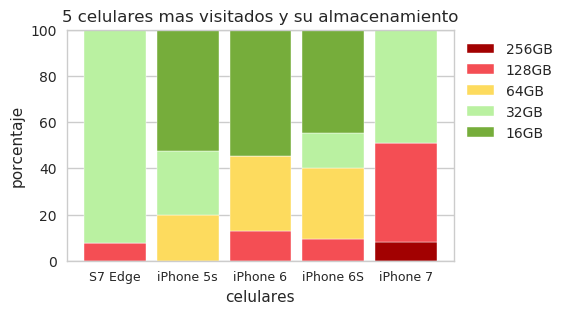

In [269]:
r = [0,1,2,3,4]
cmvps = cel_mas_visitados_por_storage

totals = [i+j+k+l+m for i,j,k,l,m in zip(cmvps['128GB'], cmvps['16GB'],\
                                         cmvps['256GB'], cmvps['32GB'], cmvps['64GB'])]
celcon128 = [i / j * 100 for i,j in zip(cmvps['128GB'], totals)]
celcon16 = [i / j * 100 for i,j in zip(cmvps['16GB'], totals)]
celcon256 = [i / j * 100 for i,j in zip(cmvps['256GB'], totals)]
celcon32 = [i / j * 100 for i,j in zip(cmvps['32GB'], totals)]
celcon64 = [i / j * 100 for i,j in zip(cmvps['64GB'], totals)]

barWidth = 0.85
names = ('S7 Edge','iPhone 5s','iPhone 6','iPhone 6S','iPhone 7')

plt.figure(figsize=(5,3))

plt.bar(r, celcon256, color='#A20101', edgecolor='white', width=barWidth, label = '256GB')

plt.bar(r, celcon128, bottom=celcon256, color='#F44E54', edgecolor='white', width=barWidth, label = '128GB')

plt.bar(r, celcon64, bottom=[i+j for i,j in zip(celcon256, celcon128)], color='#FDDB5E', edgecolor='white'\
                                                , width=barWidth, label = '64GB')

plt.bar(r, celcon32, bottom=[i+j+k for i,j,k in zip(celcon256, celcon128,celcon64)], color='#BAF1A1'\
                                                    , edgecolor='white', width=barWidth, label = '32GB')

plt.bar(r, celcon16, bottom=[i+j+k+l for i,j,k,l in zip(celcon256, celcon128,celcon64,celcon32)], color='#76AD3B'\
                                                        , edgecolor='white', width=barWidth, label = '16GB')

plt.xticks(r, names,fontsize=9)
plt.title('5 celulares mas visitados y su almacenamiento')
plt.xlabel('celulares')
plt.ylabel('porcentaje')

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 
plt.show()

In [254]:
cel_mas_visitados_por_color = viewed_product[['model','color']].loc[viewed_product['model'].isin(['iPhone 5s','iPhone 6','iPhone 6S','iPhone 7','iPhone 7 Plus'])]
cel_mas_visitados_por_color = pd.crosstab(cel_mas_visitados_por_color.model,cel_mas_visitados_por_color.color)
cel_mas_visitados_por_color

color,Cinza espacial,Dourado,Ouro Rosa,Prateado,Preto Brilhante,Preto Matte,Vermelho
model,,,,,,,
iPhone 5s,16745,11230,0,14070,0,0,0
iPhone 6,19306,14126,0,14106,0,0,0
iPhone 6S,11046,8969,10636,6279,0,0,0
iPhone 7,0,4038,6593,1709,3468,9231,1291
iPhone 7 Plus,0,2014,5521,1497,2332,5722,767


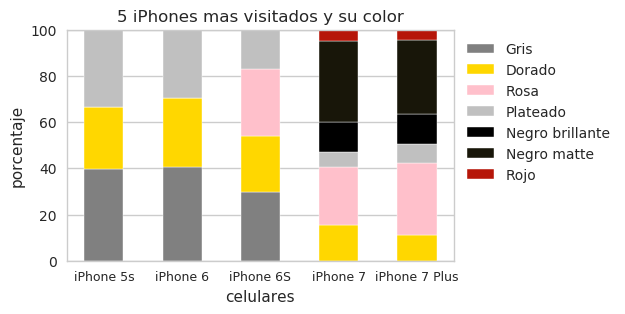

In [283]:
r = [0,1,2,3,4]
cmvpc = cel_mas_visitados_por_color

totals = [i+j+k+l+m+n+o for i,j,k,l,m,n,o in zip(cmvpc['Cinza espacial']\
                                                 , cmvpc['Dourado'],cmvpc['Ouro Rosa'], cmvpc['Prateado']\
                                                 , cmvpc['Preto Brilhante'],cmvpc['Preto Matte'],cmvpc['Vermelho'])]

celconCinza = [i / j * 100 for i,j in zip(cmvpc['Cinza espacial'], totals)]
celconDourado = [i / j * 100 for i,j in zip(cmvpc['Dourado'], totals)]
celconRosa = [i / j * 100 for i,j in zip(cmvpc['Ouro Rosa'], totals)]
celconPrateado = [i / j * 100 for i,j in zip(cmvpc['Prateado'], totals)]
celconBrilhante = [i / j * 100 for i,j in zip(cmvpc['Preto Brilhante'], totals)]
celconMatte = [i / j * 100 for i,j in zip(cmvpc['Preto Matte'], totals)]
celconVermelho = [i / j * 100 for i,j in zip(cmvpc['Vermelho'], totals)]

barWidth = 0.5
names = ('iPhone 5s','iPhone 6','iPhone 6S','iPhone 7','iPhone 7 Plus')

plt.figure(figsize=(5,3))

plt.bar(r, celconCinza, color='gray', edgecolor='white', width=barWidth, label = 'Gris')

plt.bar(r, celconDourado, bottom=celconCinza, color='gold', edgecolor='white', width=barWidth, label = 'Dorado')

plt.bar(r, celconRosa, bottom=[i+j for i,j in zip(celconCinza, celconDourado)], color='pink', edgecolor='white', width=barWidth, label = 'Rosa')

plt.bar(r, celconPrateado, bottom=[i+j+k for i,j,k in zip(celconCinza, celconDourado,celconRosa)], color='silver', edgecolor='white', width=barWidth, label = 'Plateado')

plt.bar(r, celconBrilhante, bottom=[i+j+k+l for i,j,k,l in zip(celconCinza, celconDourado,celconRosa,celconPrateado)], color='black', edgecolor='white', width=barWidth, label = 'Negro brillante')

plt.bar(r, celconMatte, bottom=[i+j+k+l+m for i,j,k,l,m in zip(celconCinza, celconDourado,celconRosa,celconPrateado,celconBrilhante)], color='#181609', edgecolor='white', width=barWidth, label = 'Negro matte')

plt.bar(r, celconVermelho, bottom=[i+j+k+l+m+n for i,j,k,l,m,n in zip(celconCinza, celconDourado,celconRosa,celconPrateado,celconBrilhante,celconMatte)], color='#b61609', edgecolor='white', width=barWidth, label = 'Rojo')




plt.xticks(r, names,fontsize=9)
plt.title('5 iPhones mas visitados y su color')
plt.xlabel('celulares')
plt.ylabel('porcentaje')

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 
plt.show()


## Visitas a un producto en el tiempo

In [304]:
# Vemos las visitas a un producto segun dia de la semana y mes.
visitas_prod_mes_dia_semana = viewed_product.groupby(['timestamp_month','timestamp_weekday']).agg({'event':'count'})\
                .pivot_table(index = 'timestamp_weekday',columns = 'timestamp_month',values = 'event')
visitas_prod_mes_dia_semana

timestamp_month,1,2,3,4,5,6
timestamp_weekday,,,,,,
Friday,1415,2040,5946,10368,29950,28228
Monday,1128,1949,5091,11369,36761,21355
Saturday,979,1658,5167,7826,26202,18481
Sunday,805,1240,3723,6907,23317,15169
Thursday,1155,2098,7201,10080,44073,20789
Tuesday,1722,2539,6566,9665,47285,22633
Wednesday,1647,2606,5972,9729,45724,20373


Text(50.7222,0.5,'Dia de la visita')

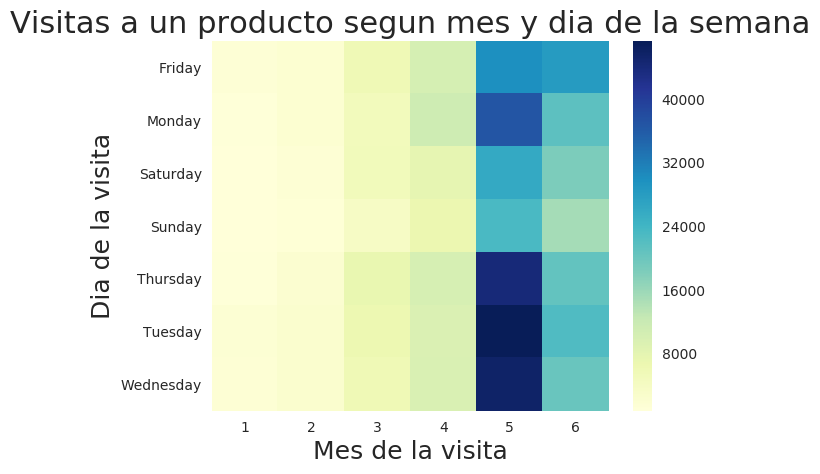

In [305]:
visitas_prod_mes_dia_semana = sns.heatmap(visitas_prod_mes_dia_semana,  cmap="YlGnBu")
visitas_prod_mes_dia_semana.set_title("Visitas a un producto segun mes y dia de la semana", fontsize=22)
visitas_prod_mes_dia_semana.set_xlabel("Mes de la visita",fontsize=18)
visitas_prod_mes_dia_semana.set_ylabel("Dia de la visita", fontsize=18)

In [306]:
# Vemos las visitas a un producto segun mes y dia del mes.
visitas_prod_mes_dia = viewed_product.groupby(['timestamp_month','timestamp_day']).agg({'event':'count'})\
                .pivot_table(index = 'timestamp_month',columns = 'timestamp_day',values = 'event')
visitas_prod_mes_dia

timestamp_day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
timestamp_month,,,,,,,,,,,,,,,,,,,,,
1,6.00,122.00,263.00,250.00,510.00,179.00,171.00,210.00,431.00,445.00,...,294.00,317.00,260.00,161.00,298.00,313.00,208.00,252.00,307.00,329.00
2,307.00,407.00,238.00,319.00,464.00,333.00,355.00,277.00,379.00,413.00,...,613.00,814.00,416.00,399.00,737.00,849.00,833.00,nan,nan,nan
3,629.00,739.00,735.00,507.00,755.00,"1,309.00",749.00,956.00,767.00,"1,211.00",...,"2,309.00","1,790.00","1,306.00","1,214.00","1,690.00","2,180.00","1,914.00","2,130.00","1,252.00",866.00
4,805.00,"1,818.00","2,654.00","2,188.00","2,182.00","1,997.00","1,486.00",925.00,"1,892.00","2,481.00",...,"1,154.00","2,081.00","2,446.00","3,084.00","3,731.00","3,655.00","3,164.00","2,545.00","3,812.00",nan
5,"3,702.00","4,231.00","4,623.00","4,362.00","4,031.00","3,496.00","4,802.00","5,589.00","5,662.00","6,556.00",...,"11,380.00","10,077.00","9,375.00","8,976.00","7,555.00","6,516.00","10,359.00","12,552.00","12,587.00","10,767.00"
6,"10,956.00","10,323.00","8,499.00","11,799.00","13,555.00","11,571.00","12,339.00","9,533.00","8,158.00","6,670.00",...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


Text(50.7222,0.5,'Mes de la visita')

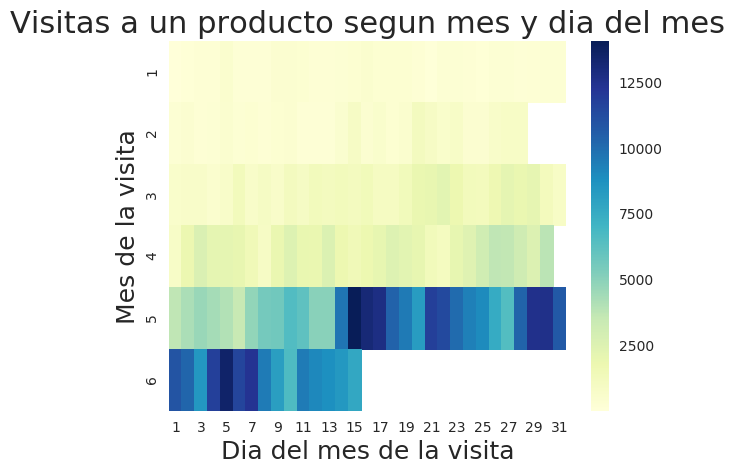

In [307]:
visitas_prod_mes_dia = sns.heatmap(visitas_prod_mes_dia,  cmap="YlGnBu")
visitas_prod_mes_dia.set_title("Visitas a un producto segun mes y dia del mes", fontsize=22)
visitas_prod_mes_dia.set_xlabel("Dia del mes de la visita",fontsize=18)
visitas_prod_mes_dia.set_ylabel("Mes de la visita", fontsize=18)

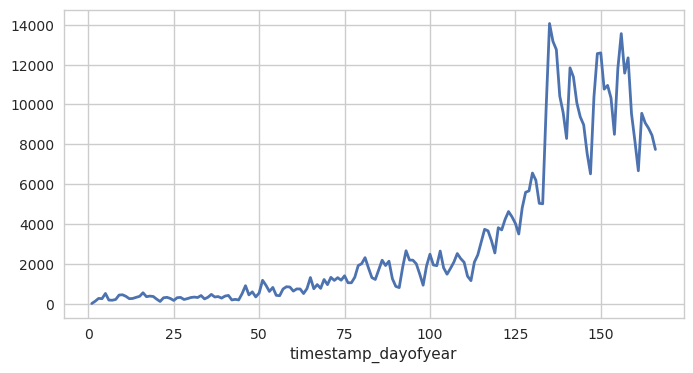

In [321]:
# Visitas a productos segun dia del año
viewed_product.groupby('timestamp_dayofyear').count().loc[:,'event'].plot(linewidth=2,figsize=(8,4))


# Veo con que puedo relacionar cada evento.
hay otras columnas que pueden tener algunos elementos null pero pueden servir igual (son pocos).

In [390]:
trocafone.groupby('event').agg(lambda x: x.isnull().sum()).T

event,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,visited site
timestamp,0,0,0,0,0,0,0,0,0,0,0
person,0,0,0,0,0,0,0,0,0,0,0
url,71,98635,33735,1172,67534,448,50957,56073,3598,528931,87378
sku,82827,98635,0,0,67534,448,50957,56073,3598,0,87378
model,82827,98635,2,0,67534,0,50957,56073,3598,0,87378
condition,82827,98635,2,0,67534,448,50957,56073,3598,0,87378
storage,82827,98635,2,0,67534,448,50957,56073,3598,0,87378
color,82827,98635,2,0,67534,448,50957,56073,3598,0,87378
skus,82827,311,33735,1172,113,448,50957,119,3598,528931,87378
search_term,82827,98635,33735,1172,67534,448,50957,7106,3598,528931,87378


## ad campaign hit

“ad campaign hit”: El usuario ingresa al sitio mediante una campana de marketing online.

Me puede interesar analizar url, person , campaign source y el tiempo.

In [396]:
ad_campaign_hit = trocafone.loc[trocafone['event'] == 'ad campaign hit']
ad_campaign_hit['campaign_source'].isnull().sum()

31

In [398]:
# La columna cuenta con 31 valores nulos. Son muy pocos comparados con los datos que tenemos, asi que trabajo
# con el resto.

# Campañas publicitarias mas populares.
ad_campaign_hit['campaign_source'].value_counts()

google              58153
criteo               9694
rtbhouse             8550
zanox                1673
emblue               1352
FacebookAds           764
afilio                692
bing                  484
voxus                 432
rakuten               310
indexa                154
buscape               141
manifest              126
Facebook               77
datacrush              60
blog                   37
afiliado               34
yotpo                  25
mercadopago            18
FacebookSocial          8
MARKETING SOCIAL        7
onsite                  3
Google Social           1
socialmedia             1
Name: campaign_source, dtype: int64

Text(0,0.5,'Campañas')

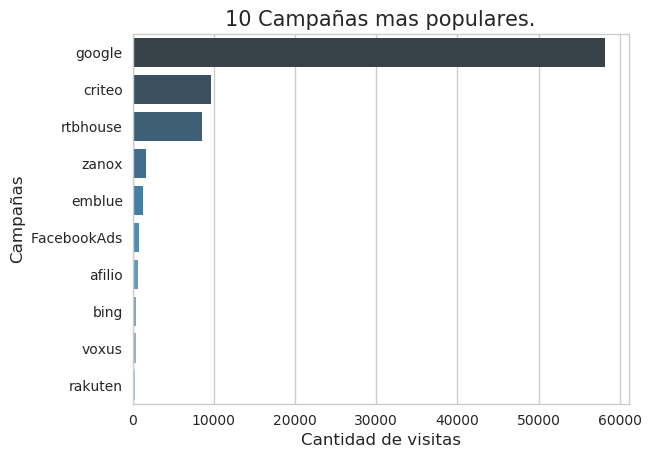

In [415]:
# Grafico de popularidad de campañas publicitarias.

g2 = sns.barplot(x=ad_campaign_hit['campaign_source'].value_counts().head(10).values, y=ad_campaign_hit['campaign_source'].value_counts().head(10).index,palette="Blues_d", orient='h')

g2.set_title("10 Campañas mas populares.", fontsize=15)
g2.set_xlabel("Cantidad de visitas", fontsize=12)
g2.set_ylabel("Campañas", fontsize=12)

In [409]:
# Campañas publicitarias mas populares segun el mes.
pd.crosstab(ad_campaign_hit.timestamp_month,ad_campaign_hit.campaign_source)

campaign_source,Facebook,FacebookAds,FacebookSocial,Google Social,MARKETING SOCIAL,afiliado,afilio,bing,blog,buscape,...,indexa,manifest,mercadopago,onsite,rakuten,rtbhouse,socialmedia,voxus,yotpo,zanox
timestamp_month,,,,,,,,,,,,,,,,,,,,,
1,0,59,3,0,0,0,101,16,1,33,...,6,1,0,0,0,136,1,0,1,70
2,2,63,0,0,0,0,26,11,0,44,...,1,0,0,3,0,274,0,0,0,62
3,12,208,0,0,0,8,55,52,13,62,...,13,2,0,0,0,717,0,0,0,157
4,6,15,0,0,0,5,94,53,11,0,...,8,31,0,0,32,1598,0,0,1,252
5,38,111,5,0,0,14,264,255,5,2,...,81,55,10,0,113,4122,0,320,19,737
6,19,308,0,1,7,7,152,97,7,0,...,45,37,8,0,165,1703,0,112,4,395


Text(0,0.5,'Cantidad de clicks')

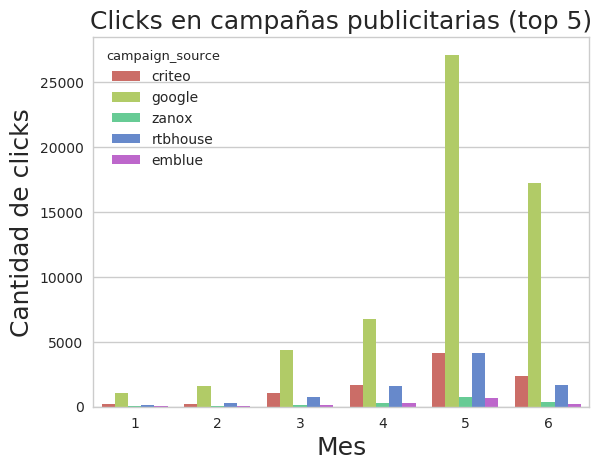

In [423]:
# Un grafico de lo mismo.
camp_ppales = ['google','criteo', 'rtbhouse', 'zanox', 'emblue']
g = sns.countplot(x="timestamp_month", hue="campaign_source"\
                , data=ad_campaign_hit.loc[ad_campaign_hit['campaign_source'].isin(camp_ppales)], palette="hls")
g.set_title("Clicks en campañas publicitarias (top 5)", fontsize=18)
g.set_xlabel("Mes", fontsize=18)
g.set_ylabel("Cantidad de clicks", fontsize=18)

Text(0,0.5,'Cantidad de clicks')

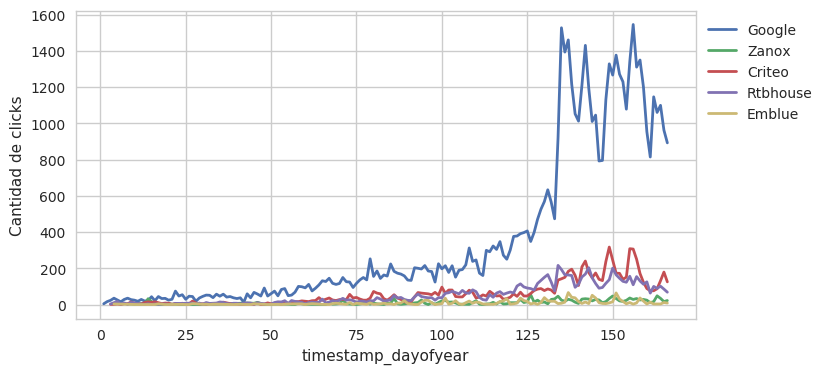

In [438]:
# Clicks por dia de las 5 campañas publicitarias mas populares (con mas clicks).
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'google']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(8,4),label = 'Google')
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'zanox']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(8,4), label = 'Zanox')
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'criteo']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(8,4), label = 'Criteo')
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'rtbhouse']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(8,4), label = 'Rtbhouse')
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'emblue']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(8,4), label = 'Emblue')

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.ylabel('Cantidad de clicks')


Text(0.5,1,'Relacion de la cantidad de clicks en campañas con visitas y compras de productos')

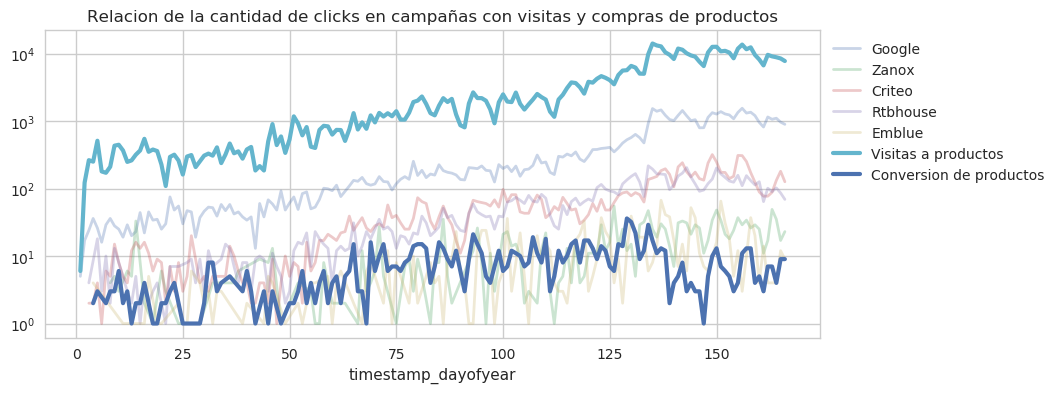

In [459]:
# Ademas podemos ver si existe algun tipo de relacion entre los clicks en la campañas publicitarias
# y las visitas y compras de los productos.

(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'google']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(10,4),label = 'Google',alpha = 0.3)
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'zanox']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2, label = 'Zanox',alpha = 0.3)
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'criteo']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2, label = 'Criteo',alpha = 0.3)
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'rtbhouse']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2, label = 'Rtbhouse',alpha = 0.3)
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'emblue']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2, label = 'Emblue',alpha = 0.3)
viewed_product.groupby('timestamp_dayofyear').count().loc[:,'event'].plot(logy = True, linewidth=3\
                                                                          ,label = 'Visitas a productos')
trocafone.loc[trocafone['event'] == 'conversion'].groupby('timestamp_dayofyear').count().loc[:,'event']\
                                                .plot(linewidth=3,label = 'Conversion de productos')

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title('Relacion de la cantidad de clicks en campañas con visitas y compras de productos')


Podemos ver que a medida que aumentan los clicks en las campañas publicitarias, tambien
lo hacen las visitas a productos, lo cual es logico. Algo quizas no tan esperado es que aunque aumentan
las visitas y los clicks en las publicidades, las conversiones no parecen aumentar. En la primer mitad podemos
ver que era mas baja la cantidad de conversiones, pero luego distingimos que estas se mantienen aroximadamente 
constantes a pesar del incremento en las visitas.


In [477]:
ad_campaign_hit['url'].value_counts(normalize = False).drop(labels = '/')
# Podemos ver que direcciones, y por lo tanto que celulares, son las que mas son clickeadas.

/comprar/iphone                                     4132
/comprar/iphone/6s                                  3393
/comprar/iphone/6                                   3228
/comprar/samsung                                    2782
/comprar/iphone/iphone-5s                           2689
/comprar/samsung/galaxy-j5                          2446
/comprar/samsung/galaxy-s7-edge                     1972
/comprar/samsung/galaxy-s8                          1499
/comprar/samsung/galaxy-j7                          1465
/comprar/samsung/galaxy-s6-edge                     1415
/comprar/motorola                                   1154
/comprar/samsung/galaxy-s7                          1139
/comprar/iphone/7                                   1120
/comprar/samsung/galaxy-s6-flat                     1067
/comprar/iphone/iphone-6s-plus                       947
/comprar/samsung/samsung-gran-prime-duos-tv          944
/comprar/samsung/a5                                  906
/comprar/samsung/              

In [400]:
ad_campaign_hit['person'].value_counts() # Ver si lo puedo relacionar con algo.

a202cfba    279
c013417a    277
5af7e2bc    220
875eb866    207
5107ab49    167
14752aa3    152
13d3dbee    147
3952fd6f    144
ff9dc4b8    144
7433a87f    133
e2b0ce1b    131
ba102035    127
d9251b63    122
778fcfbd    119
0b2bff0b    116
dfb2ba6c    112
f3c1111e    110
8fb99250    109
4f50d6c5    102
4ba1247a    101
95b58cd6    100
ff637ea2    100
9ab4565c     92
a1e1f8ec     91
f0887975     87
3444791f     86
8ade1780     86
5b9f64aa     86
2b87e81a     85
f3a682fb     84
           ... 
95c9dd26      1
3d4d0ab2      1
c9d30fd8      1
9ad762c0      1
24021085      1
177b7b17      1
a57f10af      1
a5ca3fb5      1
fa55b465      1
6d14e3c5      1
beee7f26      1
f461d5b8      1
980ceb85      1
59cf3582      1
0e3fac55      1
876c29b7      1
cf26aa0e      1
c0fa6755      1
72e5754d      1
6b151331      1
af2c694e      1
251464c6      1
e15df9f5      1
d622c0ad      1
8392c019      1
6b84791a      1
95f3c5c9      1
074c4a41      1
c829b5d3      1
6e1dff63      1
Name: person, Length: 21

## generic listing

El usuario visita la homepage.

In [ ]:
# Podria investigar que paso con los skus, person y el tiempo.

## searched products
El usuario realiza una búsqueda de productos en la interfaz de búsqueda del site.


In [495]:
# Que suelen buscar los usuarios.
searched_products = trocafone.loc[trocafone['event'] == 'searched products']
searched_products['search_term'].str.lower().value_counts(normalize = True)

# Podemos ver que la mayoria de las busquedas son de celulares iPhone, seguido por los samsung.

iphone 6                                                                      0.07
iphone                                                                        0.06
iphone 6s                                                                     0.05
iphone 7                                                                      0.03
iphone 5s                                                                     0.02
j7                                                                            0.02
motorola                                                                      0.02
j5                                                                            0.02
s7                                                                            0.02
iphone 6 plus                                                                 0.02
s8                                                                            0.01
iphone se                                                                     0.01
sams

In [544]:
# calculo aproximado.
iphone = searched_products['search_term'].str.lower().str.contains('iphone|5s|6s|7s').sum()
total = searched_products['search_term'].count()
(iphone / total) * 100 
# Los iphone constituyen aproximadamente el 40 %  de las busquedas.

39.551126268711585

In [550]:
samsung = searched_products['search_term'].str.lower().str.contains('samsung|s3|s4|s5|s6|s7|s8').sum()
(samsung / total) * 100
# Los samsung constituyen aproximadamente un 20 % de la busquedas.

18.101987052504747

In [553]:
motorola = searched_products['search_term'].str.lower().str.contains('moto').sum()
(motorola / total) * 100
# Los motorola constituyen aproximadamente un 10 % de la busquedas.

11.816121061122796

## search engine hit
“search engine hit”: El usuario ingresa al sitio mediante un motor de búsqueda web.


In [559]:
search_engine_hit = trocafone.loc[trocafone['event'] == 'search engine hit']

# Las visitas se dan por un motor de busqueda. Cuales son los mas populares?
search_engine_hit['search_engine'].value_counts()

Google    50240
Bing        424
Yahoo       287
Ask           6
Name: search_engine, dtype: int64

Text(0,0.5,'Motores de busqueda')

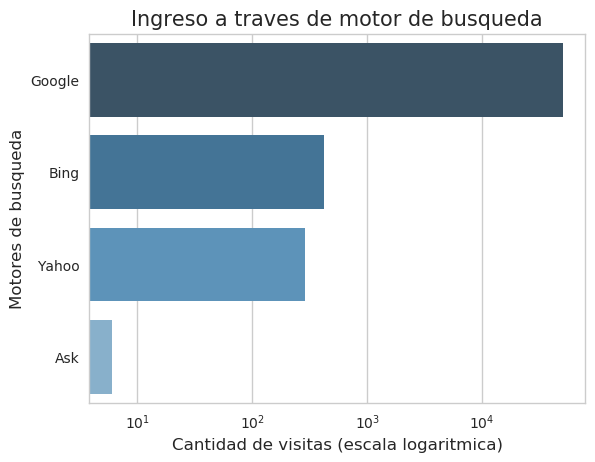

In [571]:
# Ingresos a traves de un motor de busqueda.

g = sns.barplot(x=search_engine_hit['search_engine'].value_counts().values, y=search_engine_hit['search_engine'].value_counts().index,palette="Blues_d", orient='h')
g.set_xscale('log')
g.set_title("Ingreso a traves de motor de busqueda", fontsize=15)
g.set_xlabel("Cantidad de visitas (escala logaritmica)", fontsize=12)
g.set_ylabel("Motores de busqueda", fontsize=12)

Text(0.5,1,'Ingresos a traves de un motor de busqueda en el tiempo')

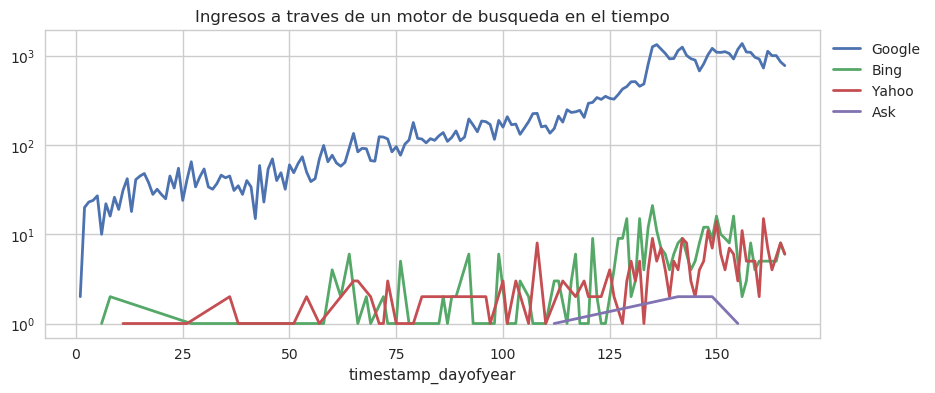

In [576]:
# Ingresos a traves de un motor de busqueda en el tiempo.

(search_engine_hit.loc[search_engine_hit['search_engine'] == 'Google']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(10,4),label = 'Google', logy = True)
(search_engine_hit.loc[search_engine_hit['search_engine'] == 'Bing']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,label = 'Bing')
(search_engine_hit.loc[search_engine_hit['search_engine'] == 'Yahoo']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,label = 'Yahoo')
(search_engine_hit.loc[search_engine_hit['search_engine'] == 'Ask']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,label = 'Ask')

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title('Ingresos a traves de un motor de busqueda en el tiempo')
